# Task 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [19]:
mu1_true = 1
mu2_true = 5
sigma1_true = 1
sigma2_true = np.sqrt(2)
pi_true = 0.3
n = 500
y = np.random.binomial(1,pi_true, n)
x = y * (mu1_true + sigma1_true*np.random.randn(n)) + (1-y)*(mu2_true + sigma2_true*np.random.randn(n))

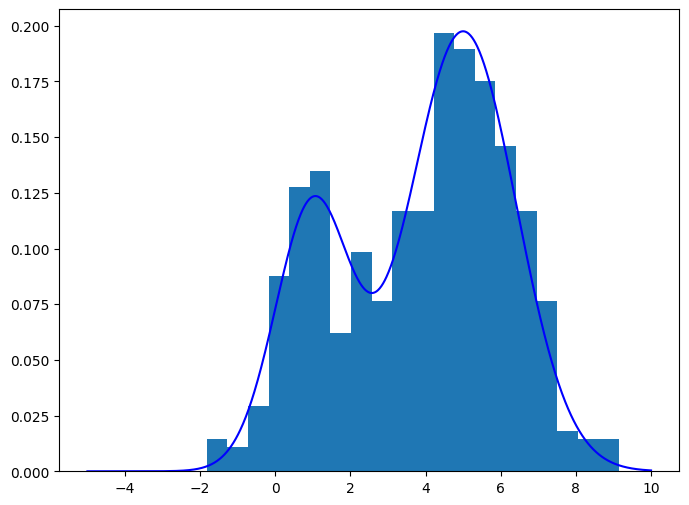

In [25]:
x_lin = np.linspace(-5, 10, 1000)
pdf = pi_true * norm.pdf(x_lin, mu1_true, sigma1_true) + (1-pi_true) * norm.pdf(x_lin, mu2_true, sigma2_true)
plt.figure(figsize=(8, 6))
plt.plot(x_lin, pdf, label='Mixture Distribution', color='b')
plt.hist(x, density=True, bins=20)
plt.show()


In [21]:
# loglikelihood function for the model
def logl(x, g, mu1, mu2, sigma1, sigma2, pi):
    return np.sum(g*(-np.log(np.sqrt(2*np.pi)*sigma1)) - (x-mu1)**2 / 2 / sigma1**2 + np.log(pi)) + (1-g)*(-np.log(np.sqrt(2*np.pi)*sigma2) - (x-mu2)**2 / 2 / sigma2**2 + np.log(1-pi))

def E_step(x, mu1, mu2, sigma1, sigma2, pi):
    return pi*norm.pdf(x, mu2,sigma2) / ((1-pi)*norm.pdf(x, mu1,sigma1) + pi*norm.pdf(x, mu2,sigma2))

def M_step(x, mu1, mu2, sigma1, sigma2, pi):
    gamma = E_step(x, mu1, mu2, sigma1, sigma2, pi)
    mu1_new = np.sum((1 - gamma)*x) / np.sum( (1-gamma)) 
    mu2_new = np.sum((gamma)*x) / np.sum((gamma))
    sigma1_new = np.sqrt(np.sum((1-gamma)*(x - mu1)**2) / np.sum(1-gamma))
    sigma2_new = np.sqrt(np.sum((gamma)*(x - mu2)**2) / np.sum(gamma))
    pi_new = np.mean(gamma)
    return mu1_new, mu2_new, sigma1_new, sigma2_new, pi_new

In [22]:
def EM(x, theta_start=None, eps = 10**(-8)):
    if not theta_start:
        mu1 = 2
        mu2 = 2
        sigma1 = 2
        sigma2 = 3
        pi = 1/2
    else:
        mu1, mu2, sigma1, sigma2, pi = theta_start
    diff = 1
    while diff > eps:
        mu1_new, mu2_new, sigma1_new, sigma2_new, pi_new = M_step(x, mu1, mu2, sigma1, sigma2, pi)
        diff = np.linalg.norm((mu1_new - mu1, mu2_new - mu2, sigma1_new - sigma1, sigma2_new - sigma2, pi_new - pi))
        mu1, mu2, sigma1, sigma2, pi = mu1_new, mu2_new, sigma1_new, sigma2_new, pi_new
    return mu1, mu2, sigma1, sigma2, pi

In [24]:
mu1, mu2, sigma1, sigma2, pi = EM(x)
print((mu1, mu2, sigma1, sigma2, pi ))
print("True parameters: " + str((mu1_true, mu2_true, sigma1_true, sigma2_true, 1-pi_true)))

(0.987791355702482, 5.089882901267394, 0.9925526889721172, 1.441994046082513, 0.7002050279616626)
True parameters: (1, 5, 1, 1.4142135623730951, 0.7)


## Convergence is dependent on theta_start

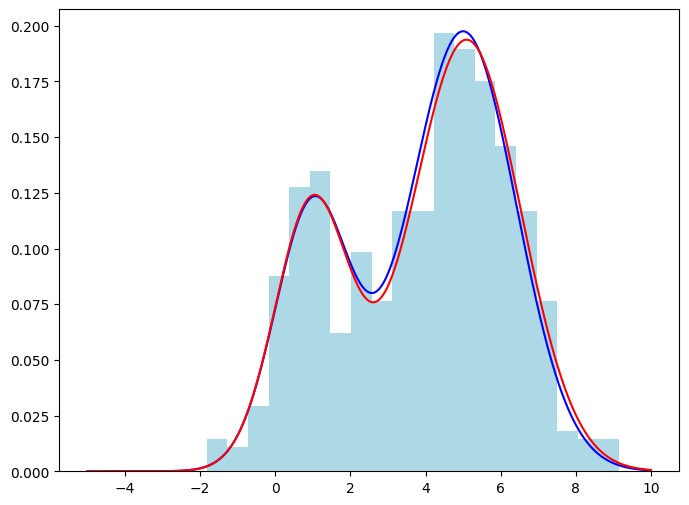

In [40]:
x_lin = np.linspace(-5, 10, 1000)
pdf = pi_true * norm.pdf(x_lin, mu1_true, sigma1_true) + (1-pi_true) * norm.pdf(x_lin, mu2_true, sigma2_true)
pdf_est = (1-pi) * norm.pdf(x_lin, mu1, sigma1) + pi * norm.pdf(x_lin, mu2, sigma2)
plt.figure(figsize=(8, 6))
plt.plot(x_lin, pdf, label='Mixture True Distribution', color='blue')
plt.plot(x_lin, pdf_est, label='Mixture Estimated Distribution', color='r')
plt.hist(x, density=True, bins=20, color="lightblue")
plt.show()